In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Esercizio10.1

### Simulated Anneling

In questo esercizio vogliamo ripetere lo studio del problema del commesso viaggiatore, utilizzando stavolta il metodo del $\textit{Simulated Anneling (SA)}$. 
Anche in questo caso questa famiglia di algoritmi prende ispirazione dalla natura: il sistema imitato è stavolta una sostanza che si raffredda lentamente, passando da una fase liquida a una solida, nello specifico cristallizzandosi. Se il processo avviene con sufficiente lentezza (il concetto di "slow cooling" è essenziale) il sistema riesce a trovare autonomamente lo stato ad energia più bassa, che è appunto il cristallo, dove gli atomi sono allineati su scale molto più grandi di quelle dell'atomo stesso.

L'idea è quindi quella di interpretare la funzione di loss del processo che vogliamo studiare (nel nostro caso la $L^{(2)}$ utlizzata per avere un'idea della lunghezza dei cammini nel TSP) come l'energia del sistema e quindi introdurre una temperatura fittizia che lentamente abbassiamo. Questo dovrebbe condurre il sistema verso il ground state, nel nostro caso quindi a un cammino il più corto possibile, ovvero lo scopo del problema.

Pertanto avremo una distribuzione di probabilità data da:
$$p(x)=\frac{\exp{(-\beta L)}}{Z}$$
e useremo l'algoritmo di Metropolis per muovere il sistema da un cammino a quello successivo. Come già spiegato in un'esercitazione precedente poichè questo algoritmo si serve del rapporto delle probabilità, la funzione di partizione $Z$ si elide.

Pertanto, estratte casualmente le $N=32$ città su un cerchio e un quadrato e creato il primo cammino, resta da decidere come procedere nell'abbassare la temperatura e quanti step fare per ogni temperatura: ciò viene chiamato "$\textit{anneling schedule}$".

##### Anneling schedule
Iniziamo con il definire come vogliamo raffreddare il sistema. Sembra sensato non seguire un approccio lineare, bensì cercare una funzione che sia asintotica allo zero, così da poter effettuare quanti step vogliamo senza preoccuparci di finire sotto zero.
Scegliamo quindi una funzione esponenziale:

$$T(x)=	T_0 \exp{(-dT *x)}$$

dove aumentiamo $x$ di 0.1 ogni cambio di temperatura, $T_0=10$ e la costante $dT=0.1$.
Per quanto riguarda il numero di step per ogni temperatura scegliamo che esso sia linearmente crescente con:

$$n_{step;i}=n_{step;i-1}+100$$

dove $n_{step;0}=10$.
Con questi parametri effettuiamo 200 processi di raffreddamento (ovvero $x=x+0.1$, che conduce alla modifica della temperatura secondo l'esponenziale proposto e alla modifica degli step).

Come ultime osservazioni: anche in questo esercizio vi è un file di input che permette di modificare i parametri della simulazione, in particolare i parametri dell'anneling schedule, visto che il numero di città è fissato.


Andiamo quindi a verificare che il Simulated Anneling abbia portato al risultato che vogliamo: come nell'esercitazione precedente abbiamo facilità a riconoscere il cammino più corto se le città sono posizionate su una circonferenza.

In [2]:
x,y=np.loadtxt("configcircle.final",unpack=True)
x0,y0=np.loadtxt("configcircle.final",unpack=True,max_rows=1)
x=np.append(x,x0)
y=np.append(y,y0)

(-1.3, 1.3)

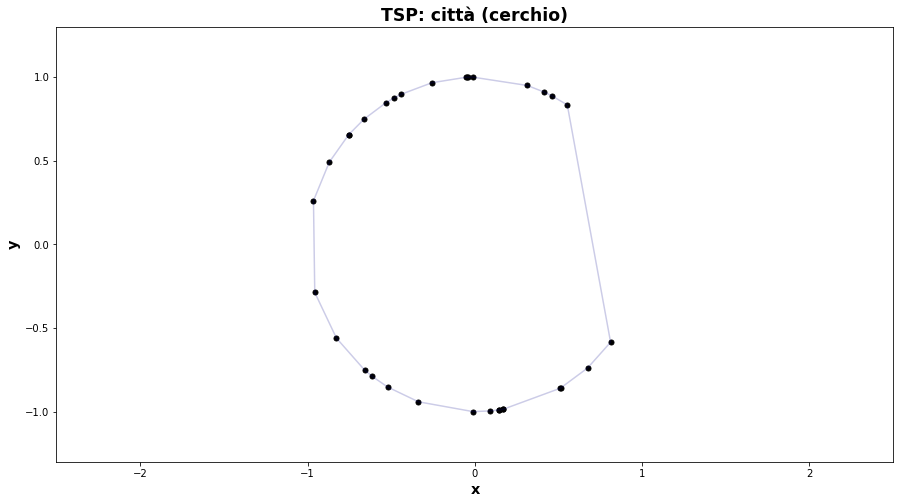

In [3]:
plt.figure(figsize=(15,8))
plt.plot(x,y, color='darkblue', alpha=0.2)
plt.scatter(x,y, marker='.', s=100, color="black",  cmap='gnuplot')
plt.xlabel('x', weight="bold", size="x-large")
plt.ylabel('y', weight="bold", size="x-large")
plt.axis("equal")
plt.title('TSP: città (cerchio)', weight="bold", size="xx-large")
plt.ylim(-1.3,1.3)
plt.xlim(-1.3,1.3)

Effettivamente l'algoritmo converge alla soluzione più corta. Applichiamolo ora nel caso del quadrato.

In [4]:
x,y=np.loadtxt("configsquare.final",unpack=True)
x0,y0=np.loadtxt("configsquare.final",unpack=True,max_rows=1)
x=np.append(x,x0)
y=np.append(y,y0)

Text(0.5, 1.0, 'TSP: città (quadrato)')

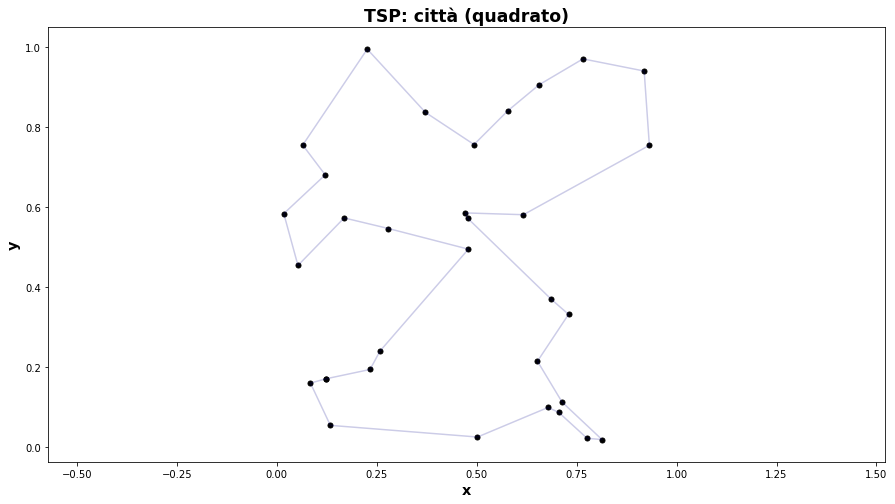

In [5]:
plt.figure(figsize=(15,8))
plt.plot(x,y, color='darkblue', alpha=0.2)
plt.scatter(x,y, marker='.', s=100, color="black",  cmap='gnuplot')
plt.xlabel('x', weight="bold", size="x-large")
plt.ylabel('y', weight="bold", size="x-large")
plt.axis("equal")
plt.title('TSP: città (quadrato)', weight="bold", size="xx-large")


Verifichiamo l'andamento della lunghezza del cammino in funzione delle iterazioni dell'algoritmo:

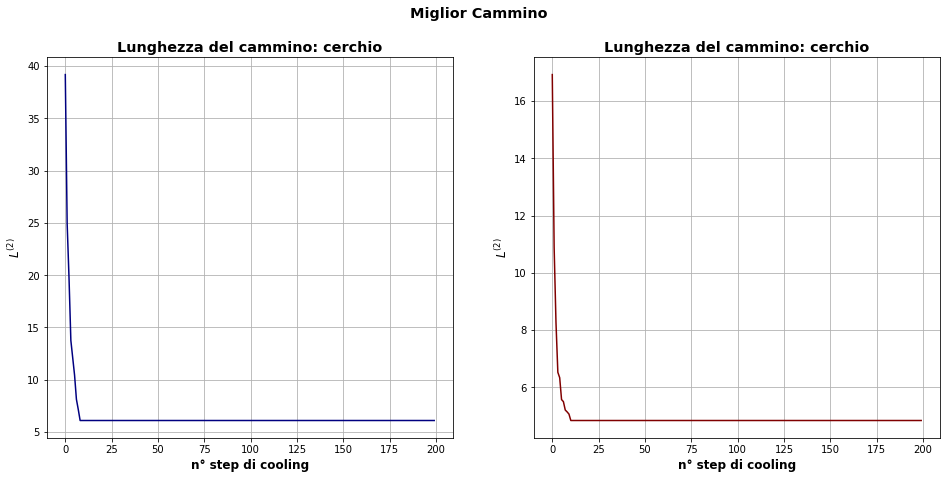

In [6]:
plt.figure(figsize=(16,7))
plt.suptitle("Miglior Cammino",weight="bold",size="x-large")
plt.subplot(121)
l2circle=np.loadtxt("bestcircle.dat")
plt.grid(True)
plt.title("Lunghezza del cammino: cerchio",weight="bold",size="x-large")
plt.xlabel("n° step di cooling", weight="bold",size="large")
plt.ylabel("$L^{(2)}$", weight="bold",size="large")
plt.plot(l2circle,color="navy")

plt.subplot(122)
plt.suptitle("Miglior Cammino",weight="bold",size="x-large")
l2circle=np.loadtxt("bestsquare.dat")
plt.grid(True)
plt.title("Lunghezza del cammino: cerchio",weight="bold",size="x-large")
plt.xlabel("n° step di cooling", weight="bold",size="large")
plt.ylabel("$L^{(2)}$", weight="bold",size="large")
plt.plot(l2circle,color="maroon")

La lunghezza dei cammini decresce quasi immediatamente al valore più basso, anche in questo caso avremmo potuto effettuare meno step dell'algoritmo e ottenere un risultato analogo.

### Parallel tempering

Vogliamo ora testare il Parallel tempering e vedere se riusciamo, tenuto fermo l'algoritmo dell'esercitazione 9, migliorarne le prestazioni nel risolvere lo stesso problema.

Per rendere le cose più interessanti procediamo, dopo $N_{migr}=10$ generazioni, a scambiare fra di loro i migliori cammini dei vari processi in parallelo.

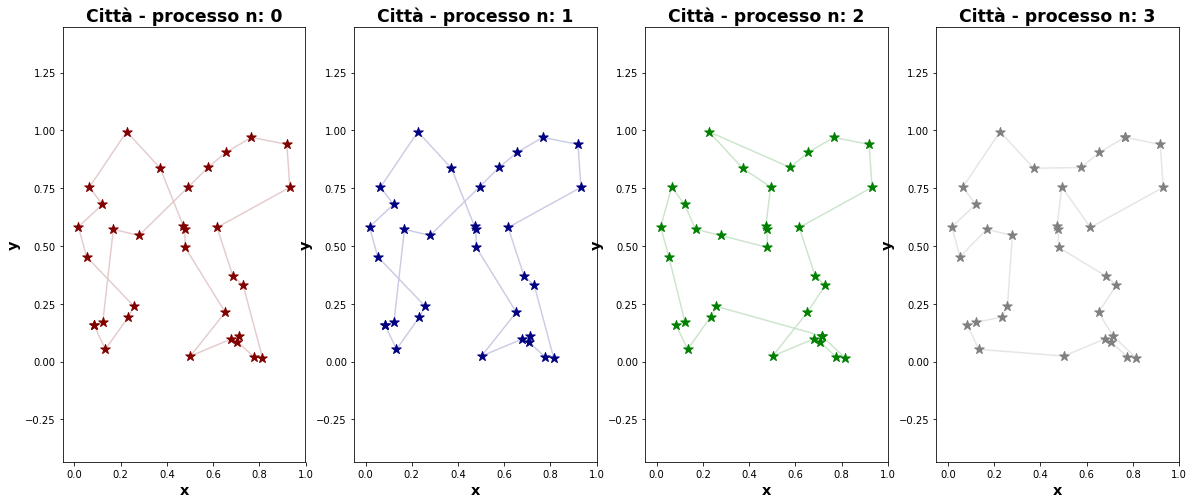

In [7]:
plt.figure(figsize=(20,8))
color=["maroon","navy","green","grey"]
for i in range(0,4):
    plt.subplot(1,4,i+1)
    x,y=np.loadtxt("mpi/mpi.bests"+np.str(i),unpack=True)
    x0,y0=np.loadtxt("mpi/mpi.bests"+np.str(i),unpack=True,max_rows=1)
    x=np.append(x,x0)
    y=np.append(y,y0) 
    plt.plot(x,y, color=color[i], alpha=0.2)
    plt.scatter(x,y, marker='*', s=100, color=color[i],  cmap='gnuplot')
    plt.xlabel('x', weight="bold", size="x-large")
    plt.ylabel('y', weight="bold", size="x-large")
    plt.axis("equal")
    plt.title('Città'+" - processo n: "+np.str(i), weight="bold", size="xx-large")

    #plt.show()

I risultati sono interessanti: per tre processi su quattro la migrazione ha portato a un risultato peggiore di quello ottenuto dall'algoritmo genetico singolo, però, prendendo il migliore dei quattro il risultato è invece analogo.

Poichè l'algoritmo genetico in sè già da solo riusciva a ordinare le 32 città e in un certo senso a svolgere appieno il suo compito, proviamo ad aumentare le città, per vedere come si comportano i due metodi in un problema più complesso.
Stampiamo però solo il processo migliore, vedendo le lunghezze del miglior cammino.

In [8]:
e=[]
for i in range(0,4):
    e.append(np.loadtxt("mpi/64/mpi.64bests"+np.str(i),unpack=True,max_rows=1))
    print("L2 del processo "+np.str(i)+" : ",e[i])
e.append(np.loadtxt("mpi/64/64bestsquare.dat",unpack=True,max_rows=1))
print("L2 del processo singolo senza migrazioni: ",  e[4])

L2 del processo 0 :  7.08252
L2 del processo 1 :  7.08252
L2 del processo 2 :  7.38795
L2 del processo 3 :  7.64206
L2 del processo singolo senza migrazioni:  7.04292


La lunghezza del processo singolo è quindi minore.
Confrontiamo quindi il processo 0 con il risultato dell'algoritmo genetico dell'esercitazione 9:

Text(0.5, 1.0, 'Algoritmo genetico es9')

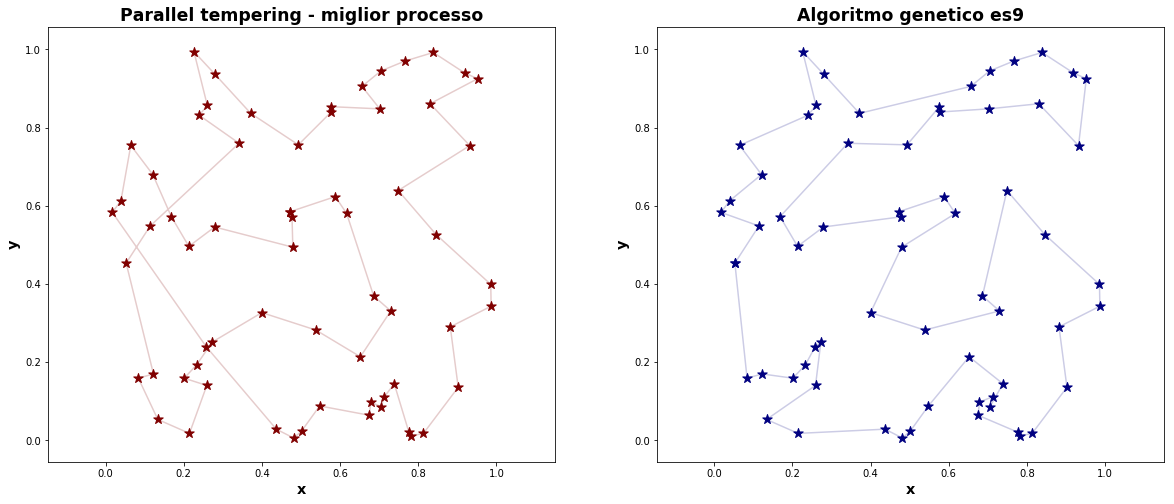

In [9]:
plt.figure(figsize=(20,8))
color=["maroon","navy"]

plt.subplot(1,2,1)
x,y=np.loadtxt("mpi/64/mpi.64bests0",unpack=True,skiprows=1)
x0,y0=np.loadtxt("mpi/64/mpi.64bests0",unpack=True,skiprows=1,max_rows=1)
x=np.append(x,x0)
y=np.append(y,y0) 
plt.plot(x,y, color=color[0], alpha=0.2)
plt.scatter(x,y, marker='*', s=100, color=color[0],  cmap='gnuplot')
plt.xlabel('x', weight="bold", size="x-large")
plt.ylabel('y', weight="bold", size="x-large")
plt.axis("equal")
plt.title('Parallel tempering - miglior processo', weight="bold", size="xx-large")

plt.subplot(1,2,2)
x,y=np.loadtxt("mpi/64/64bestsquare.dat",unpack=True,skiprows=1)
x0,y0=np.loadtxt("mpi/64/64bestsquare.dat",unpack=True,max_rows=1,skiprows=1)
x=np.append(x,x0)
y=np.append(y,y0) 
plt.plot(x,y, color=color[1], alpha=0.2)
plt.scatter(x,y, marker='*', s=100, color=color[1],  cmap='gnuplot')
plt.xlabel('x', weight="bold", size="x-large")
plt.ylabel('y', weight="bold", size="x-large")
plt.axis("equal")
plt.title('Algoritmo genetico es9', weight="bold", size="xx-large")

Da questo confronto sembra che le migrazioni non abbiano apportato miglioramenti. Il fatto che il risultato risulti ancora leggermente peggiore dell'algoritmo singolo può essere dovuto semplicemente al fatto che il seme con cui è fatto partire l'algoritmo singolo conduca a un cammino casuale più favorevole e non effettivamente al fatto che le migrazioni peggiorino le performance, tanto più che i risultati sono praticamente uguali.